# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the DATA SET

In [2]:
wine_data = pd.read_csv(r"C:\Users\ptsga\Downloads\wine.csv\wine.csv")
wine_data

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,$32,87,NaN,"Held back nearly five years, this Cab still ha..."
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15%,$17,85,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful..."
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f..."
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5%,$18,86,NaN,The nose is rather neutral save for distant ar...
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5%,$21,85,NaN,"This intriguing blend of Falanghina, Biancolel..."
...,...,...,...,...,...,...,...,...,...,...,...
323232,Maddalena 2017 Rosé (Paso Robles),Maddalena,Rose,NaN,Rosé,"Paso Robles, Central Coast, California, US",12.5%,$18,87,Matt Kettmann,"Candied raspberry, cranberry, orange juice and..."
323233,Toscolo 2015 Vernaccia di San Gimignano,Toscolo,White,NaN,"Vernaccia, Italian White","Vernaccia di San Gimignano, Tuscany, Italy",12.5%,$11,87,Kerin O’Keefe,"Aromas of white spring flower, yellow pear and..."
323234,Domaine G. Metz 2017 Pinot Blanc (Alsace),Domaine G. Metz,White,NaN,Pinot Blanc,"Alsace, Alsace, France",13%,$20,90,Anne Krebiehl MW,"A tinge of earth clings to the ripe, almost ju..."
323235,Huston 2019 Chicken Dinner Red (Idaho),Huston,Red,Chicken Dinner,"Red Blends, Red Blends","Idaho, Idaho, US",14.3%,$18,87,Sean P. Sullivan,"Fruit-forward aromas of plum, huckleberry and ..."


# Exploring the Dataset

In [3]:
wine_data.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,$32,87,NaN,"Held back nearly five years, this Cab still ha..."
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15%,$17,85,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful..."
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f..."
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5%,$18,86,NaN,The nose is rather neutral save for distant ar...
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5%,$21,85,NaN,"This intriguing blend of Falanghina, Biancolel..."


In [4]:
wine_data.dtypes

wine           object
winery         object
category       object
designation    object
varietal       object
appellation    object
alcohol        object
price          object
rating          int64
reviewer       object
review         object
dtype: object

In [5]:
wine_data.describe()


,rating
count,323237.000000
mean,88.585119
std,3.186544
min,80.000000
25%,86.000000
50%,88.000000
75%,91.000000
max,100.000000


# Data Preparation and Cleaning

## Checking for null values

In [6]:
wine_data.isnull().sum()  #detecting missing values


wine               0
winery             0
category           0
designation    93545
varietal       21047
appellation     2607
alcohol        41021
price          23955
rating             0
reviewer       72162
review          1129
dtype: int64

## Filling the null values with mode values of the respective columns

In [7]:
wine_data['designation'].fillna(wine_data['designation'].mode()[0], inplace = True)
wine_data['varietal'].fillna(wine_data['varietal'].mode()[0], inplace = True)
wine_data['appellation'].fillna(wine_data['appellation'].mode()[0], inplace = True)
wine_data['alcohol'].fillna(wine_data['alcohol'].mode()[0], inplace = True)
wine_data['price'].fillna(wine_data['price'].mode()[0], inplace = True)
wine_data['reviewer'].fillna(wine_data['reviewer'].mode()[0], inplace = True)
wine_data['review'].fillna(wine_data['review'].mode()[0], inplace = True)

In [8]:
wine_data.isnull().sum()


wine           0
winery         0
category       0
designation    0
varietal       0
appellation    0
alcohol        0
price          0
rating         0
reviewer       0
review         0
dtype: int64

In [9]:
wine_data['alcohol']

0         13.5%
1           15%
2         13.5%
3         13.5%
4         13.5%
          ...  
323232    12.5%
323233    12.5%
323234      13%
323235    14.3%
323236    13.5%
Name: alcohol, Length: 323237, dtype: object

## As the column alcohol has percentage values, we'll be Converting wine data percentage to float values

In [10]:
wine_data['alcohol']=wine_data['alcohol'].str.replace('%','')

In [11]:
wine_data['alcohol']=wine_data['alcohol'].astype(float)

In [12]:
wine_data.dtypes

wine            object
winery          object
category        object
designation     object
varietal        object
appellation     object
alcohol        float64
price           object
rating           int64
reviewer        object
review          object
dtype: object

C:\Users\ptsga\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


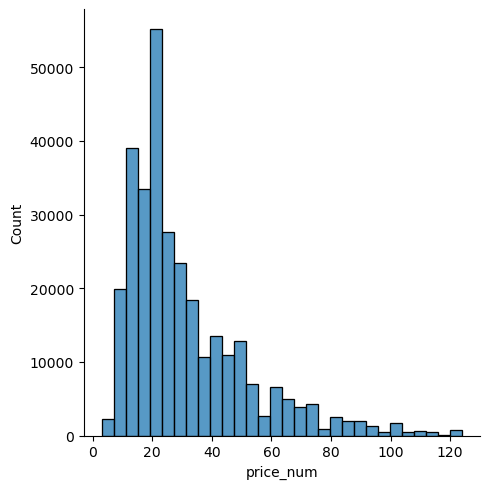

In [13]:
wine_data1 = wine_data.dropna(subset = ['price'])
price_nums = []
for index, row in wine_data1.iterrows():
    if row["price"].replace("$", "").isdecimal():
        price_nums.append(float(row["price"].replace("$", "")))
    else:
        price_nums.append(np.nan)
wine_data2 = wine_data1.copy()
wine_data2["price_num"] = price_nums
wine_data2 = wine_data2.dropna(subset = ['price_num'])
sns.displot(wine_data2.loc[lambda _wine_data: _wine_data["price_num"] < 125]["price_num"] , bins=30)
plt.show()

In [14]:
wine_data2

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,price_num
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",13.5,$32,87,Roger Voss,"Held back nearly five years, this Cab still ha...",32.0
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,Reserve,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,$17,85,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",17.0
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",13.5,$20,90,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f...",20.0
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,$18,86,Roger Voss,The nose is rather neutral save for distant ar...,18.0
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,$21,85,Roger Voss,"This intriguing blend of Falanghina, Biancolel...",21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323232,Maddalena 2017 Rosé (Paso Robles),Maddalena,Rose,Reserve,Rosé,"Paso Robles, Central Coast, California, US",12.5,$18,87,Matt Kettmann,"Candied raspberry, cranberry, orange juice and...",18.0
323233,Toscolo 2015 Vernaccia di San Gimignano,Toscolo,White,Reserve,"Vernaccia, Italian White","Vernaccia di San Gimignano, Tuscany, Italy",12.5,$11,87,Kerin O’Keefe,"Aromas of white spring flower, yellow pear and...",11.0
323234,Domaine G. Metz 2017 Pinot Blanc (Alsace),Domaine G. Metz,White,Reserve,Pinot Blanc,"Alsace, Alsace, France",13.0,$20,90,Anne Krebiehl MW,"A tinge of earth clings to the ripe, almost ju...",20.0
323235,Huston 2019 Chicken Dinner Red (Idaho),Huston,Red,Chicken Dinner,"Red Blends, Red Blends","Idaho, Idaho, US",14.3,$18,87,Sean P. Sullivan,"Fruit-forward aromas of plum, huckleberry and ...",18.0


In [15]:
wine_data2

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,price_num
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",13.5,$32,87,Roger Voss,"Held back nearly five years, this Cab still ha...",32.0
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,Reserve,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,$17,85,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",17.0
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",13.5,$20,90,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f...",20.0
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,$18,86,Roger Voss,The nose is rather neutral save for distant ar...,18.0
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,$21,85,Roger Voss,"This intriguing blend of Falanghina, Biancolel...",21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323232,Maddalena 2017 Rosé (Paso Robles),Maddalena,Rose,Reserve,Rosé,"Paso Robles, Central Coast, California, US",12.5,$18,87,Matt Kettmann,"Candied raspberry, cranberry, orange juice and...",18.0
323233,Toscolo 2015 Vernaccia di San Gimignano,Toscolo,White,Reserve,"Vernaccia, Italian White","Vernaccia di San Gimignano, Tuscany, Italy",12.5,$11,87,Kerin O’Keefe,"Aromas of white spring flower, yellow pear and...",11.0
323234,Domaine G. Metz 2017 Pinot Blanc (Alsace),Domaine G. Metz,White,Reserve,Pinot Blanc,"Alsace, Alsace, France",13.0,$20,90,Anne Krebiehl MW,"A tinge of earth clings to the ripe, almost ju...",20.0
323235,Huston 2019 Chicken Dinner Red (Idaho),Huston,Red,Chicken Dinner,"Red Blends, Red Blends","Idaho, Idaho, US",14.3,$18,87,Sean P. Sullivan,"Fruit-forward aromas of plum, huckleberry and ...",18.0


# Getting Useful Insights from the dataset

## Top 10 Rated wine according to the rating in Wine Reviews Data¶


In [16]:
Top_rated_wine = wine_data2.sort_values('rating',ascending = False).head(10)
Top_rated_wine

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,price_num
184528,Patricia Green Cellars 2016 Estate Vineyard Bo...,Patricia Green Cellars,Red,Estate Vineyard Bonshaw Block,Pinot Noir,"Ribbon Ridge, Willamette Valley, Oregon, US",14.6,$60,100,Paul Gregutt,This 100% Pommard clone wine from a 1990 plant...,60.0
298699,Le Chiuse 2013 Brunello di Montalcino,Le Chiuse,Red,Reserve,Sangiovese,"Brunello di Montalcino, Tuscany, Italy",14.0,$79,100,Kerin O’Keefe,"Dark spice, pipe tobacco, blue flower, crushed...",79.0
55561,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cardinale,Red,Reserve,Cabernet Sauvignon,"Napa Valley, Napa, California, US",13.5,$200,100,Roger Voss,Tasted in a flight of great and famous Napa wi...,200.0
133162,Philipponnat 2010 Clos des Goisses Extra Brut ...,Philipponnat,Sparkling,Clos des Goisses Extra Brut,"Champagne Blend, Sparkling","Champagne, Champagne, France",12.0,$386,100,Roger Voss,This famed Champagne comes from one of the ste...,386.0
210612,Sloan 2002 Red Wine Red (Rutherford),Sloan,Red,Red Wine,"Cabernet Blend, Bordeaux-style Red Blend","Rutherford, Napa, California, US",13.5,$245,100,Roger Voss,Impossibly aromatic. Hard to imagine greater c...,245.0
317921,Château Ausone 2015 Saint-Émilion,Château Ausone,Red,Reserve,Bordeaux-style Red Blend,"Saint-Émilion, Bordeaux, France",14.5,$1000,100,Roger Voss,This magnificent wine brings together the grea...,1000.0
124731,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Casa Ferreirinha,Red,Barca-Velha,Portuguese Red,"Douro, Portugal",14.0,$450,100,Roger Voss,This is the latest release of what has long be...,450.0
203668,Verité 2007 La Muse Red (Sonoma County),Verité,Red,La Muse,Bordeaux-style Red Blend,"Sonoma County, Sonoma, California, US",14.4,$450,100,Roger Voss,This wine dazzles with perfection. Sourced fro...,450.0
281085,Taylor Fladgate 2017 Vargellas Vinhas Velhas ...,Taylor Fladgate,Port/Sherry,Vargellas Vinhas Velhas,"Port, Port Blend","Port, Portugal",20.0,$250,100,Roger Voss,"This is a magnificent, opulent wine, with rich...",250.0
107886,Château Angélus 2016 Saint-Émilion,Château Angélus,Red,Reserve,Bordeaux-style Red Blend,"Saint-Émilion, Bordeaux, France",14.5,$400,100,Roger Voss,"This is a rich, perfumed wine, with dense tann...",400.0


## Top 10 most expensive wine according to the rating in Wine Reviews Data¶


In [17]:
top_10_expensive_wine = wine_data2.sort_values('price',ascending = False).head(10)
top_10_expensive_wine

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,price_num
296196,Arnaud Baillot 2018 Grand Cru (Romanée-St.-Vi...,Arnaud Baillot,Red,Grand Cru,Pinot Noir,"Romanée-St.-Vivant, Burgundy, France",13.5,$999,96,Anne Krebiehl MW,An initial whiff of graphite flashes before th...,999.0
211946,Château La Mission Haut-Brion 2015 Pessac-Léo...,Château La Mission Haut-Brion,White,Reserve,"Bordeaux-style White Blend, White Blend","Pessac-Léognan, Bordeaux, France",13.5,$992,95,Roger Voss,"Concentrated and with tight, mineral fruitines...",992.0
178941,Nuiton-Beaunoy 2015 Les Chaffots Premier Cru ...,Nuiton-Beaunoy,Red,Les Chaffots Premier Cru,Pinot Noir,"Morey-Saint-Denis, Burgundy, France",13.0,$99,94,Roger Voss,"This wine is rich, with great tannins as well ...",99.0
105257,Rattalino 2011 Quarantacinque Riserva (Barbar...,Rattalino,Red,Quarantacinque Riserva,Nebbiolo,"Barbaresco, Piedmont, Italy",14.5,$99,89,Kerin O’Keefe,"Leather, truffle, wild berry and scorched eart...",99.0
204111,Fontanafredda 2015 Proprietà in Fontanafredda ...,Fontanafredda,Red,Proprietà in Fontanafredda,Nebbiolo,"Barolo, Piedmont, Italy",14.0,$99,94,Kerin O’Keefe,"Aromas of camphor, rose and star anise mingle ...",99.0
182186,Château de Tracy 2005 Haute Densité (Pouilly-...,Château de Tracy,White,Haute Densité,Sauvignon Blanc,"Pouilly-Fumé, Loire Valley, France",13.0,$99,93,Roger Voss,"From a vineyard planted with almost 7,000 vine...",99.0
104215,Mailly Grand Cru 2012 L'Intemporelle Brut (Ch...,Mailly Grand Cru,Sparkling,L'Intemporelle Brut,"Champagne Blend, Sparkling","Champagne, Champagne, France",12.0,$99,93,Roger Voss,With a slightly lower percentage of Pinot Noir...,99.0
38794,Chehalem 2014 Statement Pinot Noir (Ribbon Ridge),Chehalem,Red,Statement,Pinot Noir,"Ribbon Ridge, Willamette Valley, Oregon, US",14.2,$99,88,Paul Gregutt,"Only occasionally produced, this reserve-level...",99.0
199133,Les Vins de Vienne 2010 Les Archevêques (Cond...,Les Vins de Vienne,White,Les Archevêques,Viognier,"Condrieu, Rhône Valley, France",14.0,$99,92,Joe Czerwinski,"Despite showing a relatively dark straw hue, t...",99.0
7248,Jean Stodden 2009 J Pinot Noir (Ahr),Jean Stodden,Red,J,Pinot Noir,"Ahr, Germany",13.5,$99,88,Anna Lee C. Iijima,"Feminine and pretty, with hints of rose, viole...",99.0


## Top 10 Cheapest wine

In [18]:
Top_10_cheapest_wine = wine_data2.sort_values('price',ascending = True).head(10)
Top_10_cheapest_wine

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,price_num
167224,Luis Saenz 2017 Rioja,Luis Saenz,Red,Reserve,Tempranillo,"Rioja, Northern Spain, Spain",14.0,$10,86,Michael Schachner,"Cherry, plum and coconut aromas along with a h...",10.0
7650,Viña del Pedregal 2017 Kidia Single Vineyard R...,Viña del Pedregal,White,Kidia Single Vineyard Reserva,Chardonnay,"Loncomilla Valley, Chile",14.0,$10,81,Michael Schachner,This sketchy Chard smells more flowery than fr...,10.0
130081,Château Merlet 2015 Bordeaux,Château Merlet,Red,Reserve,Bordeaux-style Red Blend,"Bordeaux, Bordeaux, France",12.5,$10,88,Roger Voss,Wood aromas and flavors are happily balanced b...,10.0
190990,Terras de Alter 2018 Terra d'Alter Trincadeira...,Terras de Alter,Red,Terra d'Alter Trincadeira-Aragonez-Syrah,Portuguese Red,"Alentejano, Portugal",14.0,$10,86,Roger Voss,"A bold, ripe wine that has soft tannins and ju...",10.0
76338,Château Grand Secret 2015 Petit Secret (Blaye...,Château Grand Secret,White,Petit Secret,"Bordeaux-style White Blend, White Blend","Blaye Côtes de Bordeaux, Bordeaux, France",13.5,$10,87,Roger Voss,Jean Lissague's blend of 90% Sauvignon Blanc a...,10.0
158187,Bellussi NV Extra Dry (Prosecco del Veneto),Bellussi,Sparkling,Extra Dry,"Prosecco, Sparkling","Prosecco del Veneto, Veneto, Italy",11.0,$10,82,Roger Voss,There's a touch of sulfur here that gives the ...,10.0
97171,Concannon 2010 Selected Vineyards Cabernet Sau...,Concannon,Red,Selected Vineyards,Cabernet Sauvignon,"California, California Other, California, US",13.0,$10,84,Virginie Boone,"A widely available offering from Concannon, th...",10.0
226771,California's Jewel 2004 Merlot (Lodi),California's Jewel,Red,Reserve,Merlot,"Lodi, Central Valley, California, US",13.5,$10,80,Roger Voss,"Smells vegetal and cardboardy, tastes thin and...",10.0
130101,Goats do Roam Wine Co. 2008 Red (Western Cape),Goats do Roam Wine Co.,Red,Reserve,Rhône-style Red Blend,"Western Cape, South Africa",14.0,$10,86,Lauren Buzzeo,An easy-drinking Rhône-style red blend with a ...,10.0
130106,Rolling 2009 Shiraz (Central Ranges),Rolling,Red,Reserve,Pinot Noir,"Central Ranges, Australia Other, Australia",13.5,$10,88,Joe Czerwinski,"Despite the inexpensive price tag, this is a s...",10.0


# Data Visualization

## Distribution of Category

C:\Users\ptsga\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


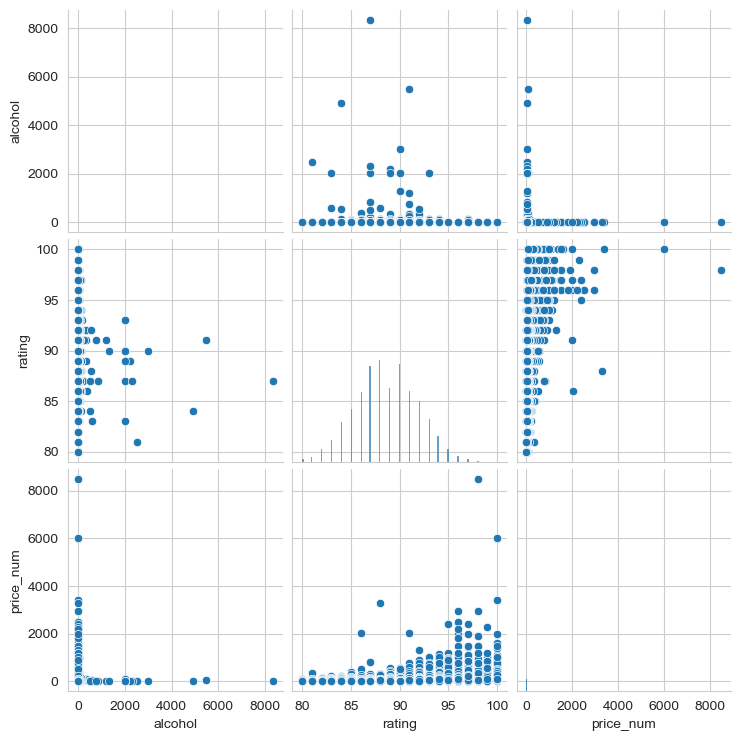

In [20]:
sns.set_style('whitegrid')
sns.pairplot(wine_data2)
plt.show()

C:\Users\ptsga\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


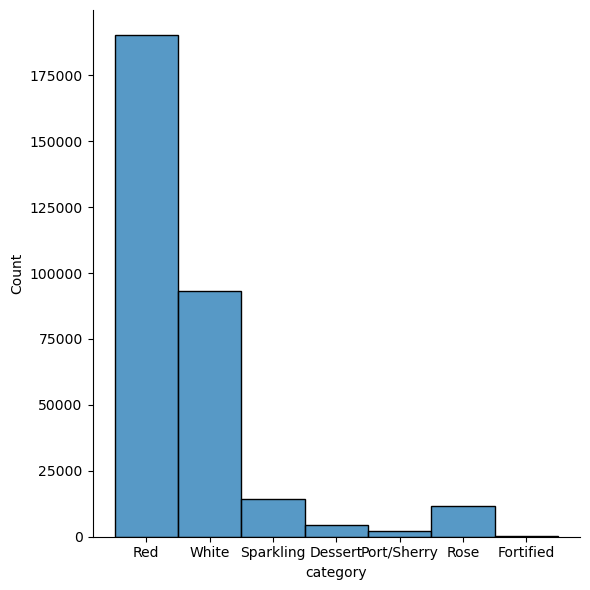

In [19]:
sns.displot(wine_data2,x='category',height=6)


## Relationship between alcohol and Rating

<Axes: xlabel='alcohol', ylabel='rating'>

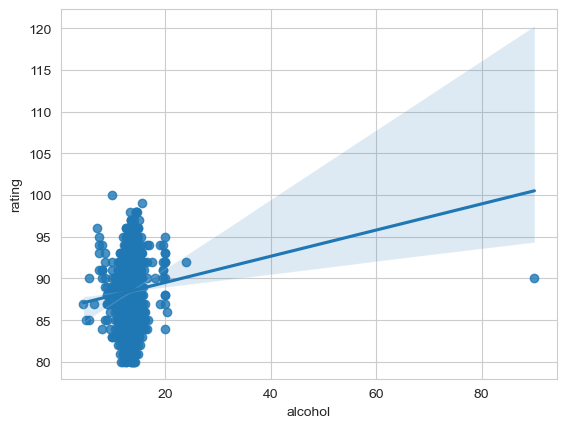

In [25]:
sample = wine_data2.sample(frac=0.01)
sns.regplot(x="alcohol", y="rating", data=sample)

## Relationship between Rating and Price

<Axes: xlabel='price_num', ylabel='rating'>

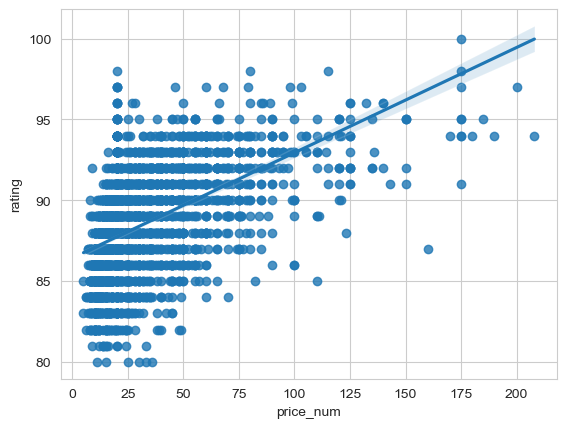

In [26]:
sns.set_style('whitegrid')
sample = wine_data2.sample(frac=0.01)
sns.regplot(x="price_num", y="rating",data=sample.loc[lambda _wine_data2: _wine_data2["price_num"] < 220])

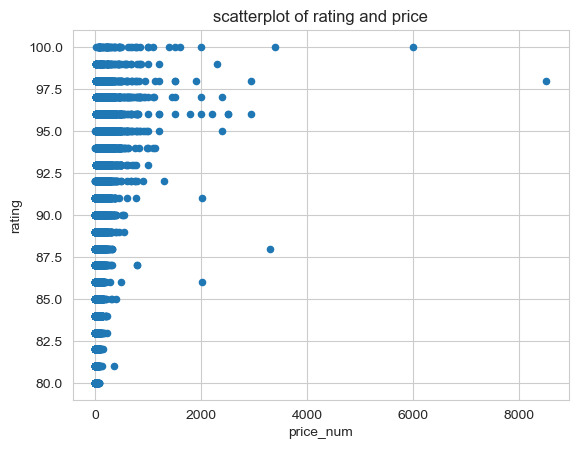

In [27]:
wine_data2.plot(kind = 'scatter',x = 'price_num',y='rating')
plt.title('scatterplot of rating and price')
plt.show()


## Boxplot of Category and Rating

<Axes: xlabel='category', ylabel='rating'>

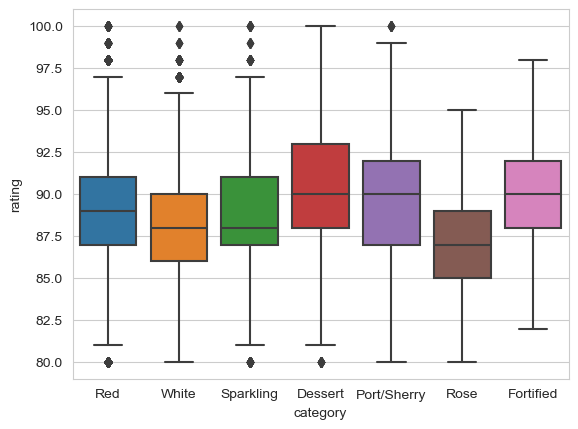

In [28]:
sns.boxplot(x="category", y="rating", data=wine_data2)


# Boxplot of category and alcohol 

(0.0, 100.0)

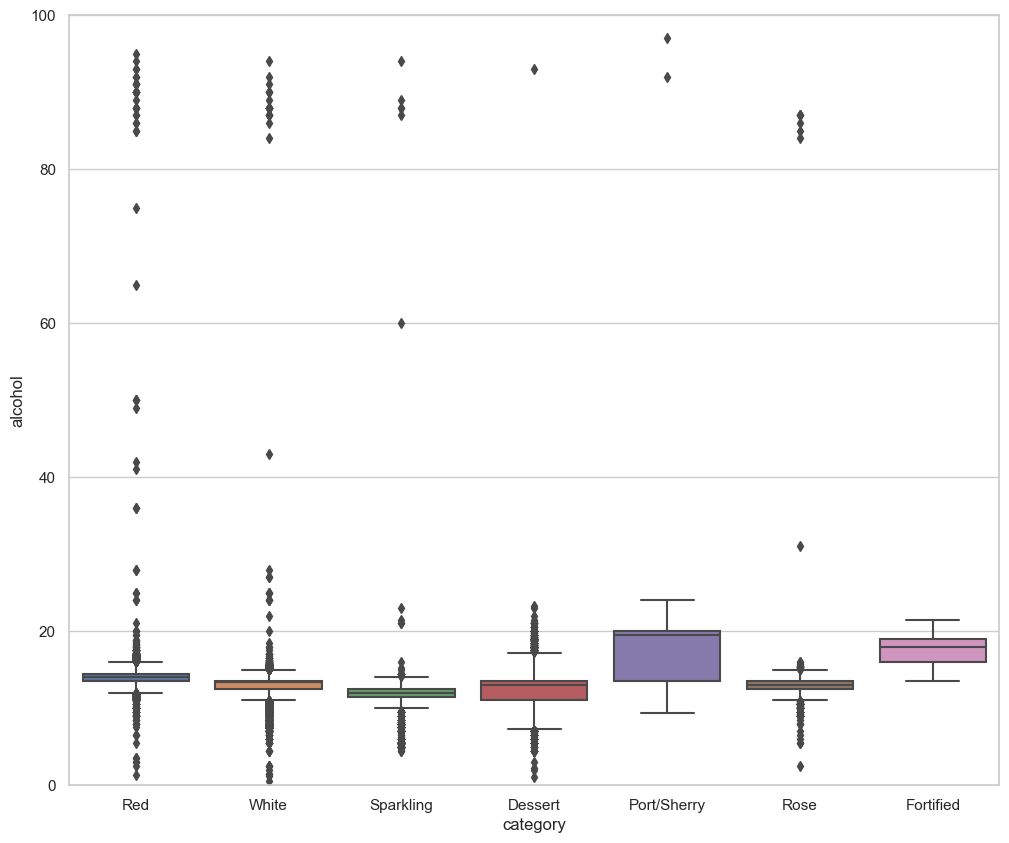

In [30]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,10))
boxplot = sns.boxplot(x="category", y="alcohol", data=wine_data2)
boxplot.set_ylim(0,100)

## Boxplot of Category and price

(0.0, 200.0)

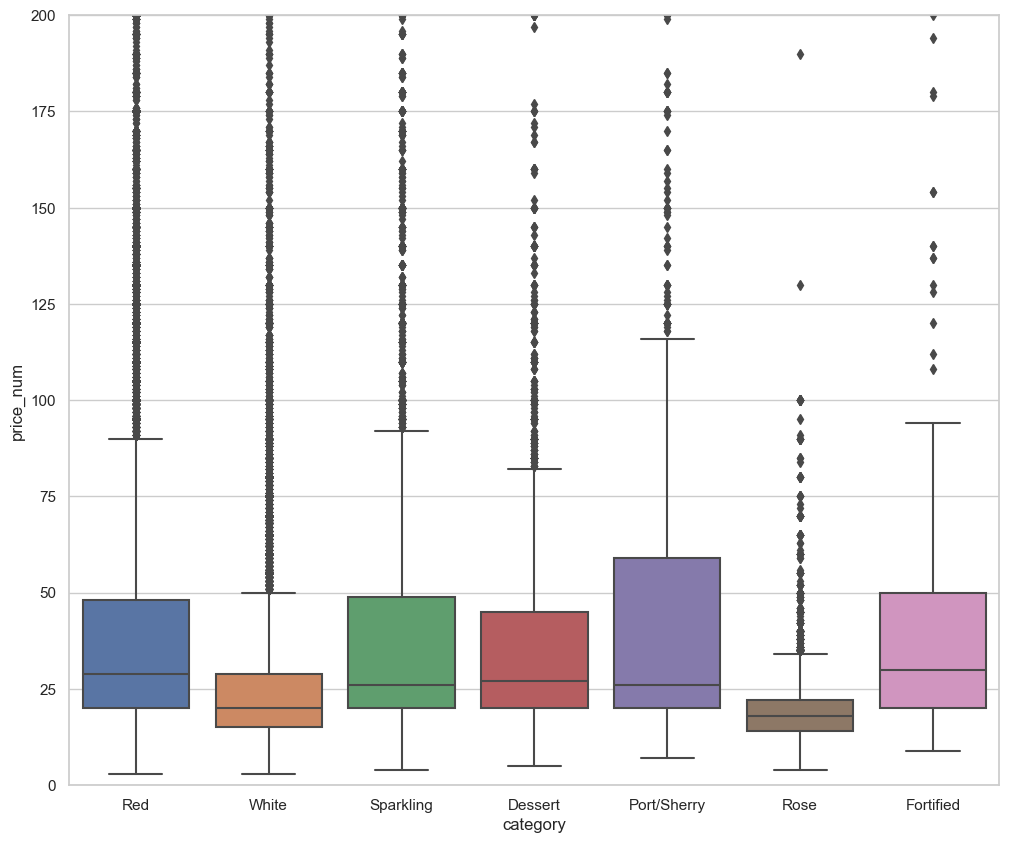

In [31]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,10))
result = sns.boxplot(x="category", y="price_num", data=wine_data2)
result.set_ylim(0,200)